# Inspect whether the cluster runs were successful when using prior samples accepted by the classifier

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [15]:
import numpy as np
from copy import deepcopy
import matplotlib as mpl
import matplotlib.pyplot as plt

import sys
sys.path.append("../model/")
sys.path.append('../../')
sys.path.append('../../simulator')

from common import col, svg, plot_pdf, samples_nd, get_labels_8pt
import viz
from viz import get_summ_stat_name, get_summ_stat_name_text, get_synapse_name, get_summ_stat_name_asterisk

In [5]:
PANEL_A = '../svg/panel_supp_compare_maf_a.svg'
PANEL_B = '../svg/panel_supp_compare_maf_b.svg'

In [6]:
datafile = '../../results/prior_samples_after_classifier/samples_full_3.npz'
data = np.load(datafile)

params = data['params']
stats = data['stats']

stats_mean = np.mean(stats, axis=0)
stats_std = np.std(stats, axis=0)

In [7]:
outfile = '../../results/11deg_post_pred/11_deg_post_pred_include_all.npz'
data_n = np.load(outfile)
sample_seeds_all = data_n["seeds"]

In [8]:
outfile = '../../results/11deg_post_pred/11_deg_post_pred.npz'
data_n = np.load(outfile)
sample_seeds = data_n["seeds"]
sample_params = data_n["params"]
sample_stats = data_n["stats"]
print('There are', len(sample_seeds), 'datapoints in this dataset')

There are 1124507 datapoints in this dataset


In [9]:
ratio_of_nan = (len(sample_seeds_all) - len(sample_seeds)) / len(sample_seeds_all) * 100
print("Overall percentage of NaNs", ratio_of_nan, "%")

Overall percentage of NaNs 10.753412698412697 %


In [10]:
npz = np.load('../../results/experimental_data/summstats_prep845_082_0044.npz')
observation = npz['summ_stats']

In [11]:
observation

array([1.17085859e+03, 2.06036434e+02, 2.14307031e+02, 4.12842187e+02,
       2.75164844e+02, 4.20460938e+01, 4.81925781e+02, 7.38278906e+02,
       1.75970382e-01, 1.83034085e-01, 3.52597820e-01, 2.35011166e-01,
       3.59104797e-02, 4.11600328e-01, 6.30544893e-01, 2.50000000e+00,
       2.50000000e+00, 2.50000000e+00])

In [12]:
ss_norm = (np.asarray(sample_stats[:,:15]) - stats_mean[:15]) / stats_std[:15]
norm_gt = (observation[:15] - stats_mean[:15]) / stats_std[:15]

### Better visualization

In [16]:
names = []
for num in range(15):
    names.append(get_summ_stat_name_text(num))

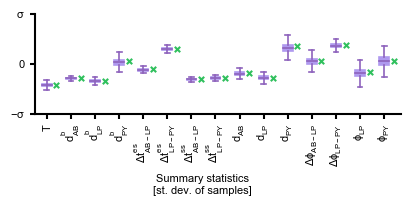

In [17]:
import seaborn as sns
import pandas as pd

with mpl.rc_context(fname='../../.matplotlibrc'):
    fig, ax = plt.subplots(1,1, figsize=(3.5*1.35, 1.3))
    plt.scatter(np.arange(15)+0.4, norm_gt, marker='x', s=15.0, color=col['GT'])
    df = pd.DataFrame(ss_norm)

    box = sns.boxplot(data=df, width=0.4, fliersize=.0, linewidth=1.2) # , color='#0570b0'
    for i, patch in enumerate(box.artists):
        r, g, b, a = patch.get_facecolor() # r, g, b, a = patch.get_facecolor()
        patch.set_facecolor(col['CONSISTENT2']) # patch.set_facecolor((r, g, b, .6))
        patch.set_edgecolor(col['CONSISTENT2'])
        for j in range(i*6,i*6+6):
            line = ax.lines[j]
            line.set_color(col['CONSISTENT1'])
            line.set_mfc(col['CONSISTENT1'])
            line.set_mec(col['CONSISTENT1'])
        
    ax.set_ylim([-1,1])
    ax.set_xlim([-0.5,14.7])
    ax.set_xticklabels(names, rotation='vertical')
    ax.set_yticks([-1, 0, 1])
    ax.set_yticklabels(['$\mathdefault{-}\sigma$', '0', '$\sigma$'])
    ax.text(0.33,  -0.68, 'Summary statistics', transform=ax.transAxes)
    ax.text(0.322, -0.80, '[st. dev. of samples]', transform=ax.transAxes)
    #plt.savefig('../results/energy/classifier/figs/summstats.png', dpi=300, bbox_inches='tight')
    plt.show()

### Load posterior predictives from delfi with MAF

In [20]:
stats_maf = np.load('../../results/11deg_post_pred/delfi_maf_post_pred.npz')['all_ss']

In [21]:
good_s = []
for s in stats_maf:
    if np.invert(np.any(np.isnan(s))):
        good_s.append(s)
good_s = np.asarray(good_s)
print('number of good samples', len(good_s))
print('fraction of bad samples', (len(stats_maf) - len(good_s)) / len(stats_maf) * 100, '%')

number of good samples 396
fraction of bad samples 20.8 %


# Compare to big NSF with shorter training

In [22]:
norm_stats_maf = (np.asarray(good_s[:,:15]) - stats_mean[:15]) / stats_std[:15]

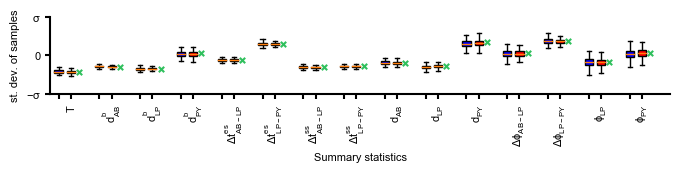

In [23]:
import seaborn as sns
import pandas as pd

with mpl.rc_context(fname='../../.matplotlibrc'):
    fig, ax = plt.subplots(1,1, figsize=(8., 1.))
    ax.scatter(np.arange(15)+0.2, norm_gt, marker='x', s=15.0, color=col['GT'])

    box1 = ax.boxplot(ss_norm, positions=np.arange(15), widths=0.2, patch_artist=True, showfliers=False)
    box2 = ax.boxplot(norm_stats_maf, positions=np.arange(15)-0.3, widths=0.2, patch_artist=True, showfliers=False) # , color='#0570b0'
    
    colors = ['r']*15
    for patch, color in zip(box1['boxes'], colors):
        patch.set_facecolor(color)
        
    colors = ['b']*15
    for patch, color in zip(box2['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.set_ylim([-1,1])
    ax.set_xlim([-0.5,14.7])
    ax.set_xticklabels(names, rotation='vertical')
    ax.set_yticks([-1, 0, 1])
    ax.set_yticklabels(['$\mathdefault{-}\sigma$', '0', '$\sigma$'])
    ax.set_xlabel('Summary statistics')
    ax.set_ylabel('st. dev. of samples')
    #plt.savefig('../results/energy/classifier/figs/fig1.png', dpi=300, bbox_inches='tight')
    plt.show()

### Made histogramm

In [47]:
# differences
sd_sbi = (norm_gt - ss_norm)**2
sd_delfi = (norm_gt - norm_stats_maf)**2

In [48]:
summed_square_diff_sbi = np.median(sd_sbi, axis=0)
summed_square_diff_delfi = np.median(sd_delfi, axis=0)

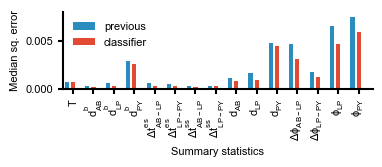

In [49]:
with mpl.rc_context(fname='../../.matplotlibrc'):
    fig, ax = plt.subplots(1, 1, figsize=(4.0, 1.))
    ax.bar(np.arange(15)-0.3, summed_square_diff_delfi, width=0.2, color='#2b8cbe', label='previous')
    ax.bar(np.arange(15), summed_square_diff_sbi, width=0.2, color='#e34a33', label='classifier')
    ax.set_ylim([0, 0.008])
    ax.set_xticks(np.arange(15))
    ax.set_xticklabels(names, rotation='vertical')
    ax.set_xlim([-0.5,14.7])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.legend()

    ax.set_ylabel('Median sq. error')
    ax.set_xlabel('Summary statistics')
    
    #plt.savefig(PANEL_A, facecolor='None', transparent=True)
    plt.show()

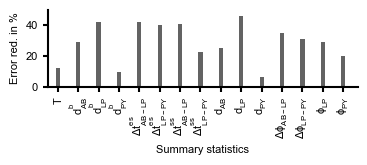

In [50]:
with mpl.rc_context(fname='../../.matplotlibrc'):
    fig, ax = plt.subplots(1, 1, figsize=(4.0, 1.))
    ax.bar(np.arange(15), (summed_square_diff_delfi - summed_square_diff_sbi) / summed_square_diff_delfi * 100, width=0.2, color='#636363')
    ax.set_ylim([0, 50])
    ax.set_xticks(np.arange(15))
    ax.set_xticklabels(names, rotation='vertical')
    ax.set_xlim([-0.5,14.7])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.axhline(1.0, linestyle='--', c='grey')

    ax.set_ylabel('Error red. in %')
    ax.set_xlabel('Summary statistics')
    
    plt.savefig(PANEL_B, facecolor='None', transparent=True)
    plt.show()

### Assemble figure

In [213]:
import time
import IPython.display as IPd

def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

In [214]:
from svgutils.compose import *

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise
factor_svg=5.5

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_consistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_consistent1 = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#9E7DD5'}
kwargs_inconsistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_text8pt = {'size': '7.7pt', 'font': 'Arial'}

sizefactor = 1.0

f = Figure("20.3cm", "4.1cm",

    Panel(
          SVG(PANEL_A).scale(svg_scale),
          Text("a", -1*factor_svg, 0*factor_svg, **kwargs_text),
    ).move(2.7*factor_svg, 2*factor_svg+dshift),
          
    Panel(
          SVG(PANEL_B).scale(svg_scale),
          Text("b",-1*factor_svg, 0*factor_svg, **kwargs_text),
    ).move(70.1*factor_svg, 2*factor_svg+dshift),
    
)

!mkdir -p fig
f.save("../fig/fig1_supp_compare_maf.svg")
svg('../fig/fig1_supp_compare_maf.svg')